In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [2]:
train = pd.read_csv("Anfo_FullVariables.csv")
train.head()

,"Stemming, m",Charge Per Hole,"Average Spacing, m","Average Burden, m","Diameter, mm"
0,3.65,9.556761,5.15,4.25,152
1,3.55,9.428631,5.50,4.40,152
2,3.60,9.494186,5.30,4.15,152
3,3.40,9.640602,5.20,4.30,152
4,3.30,9.837349,5.30,4.20,152


In [3]:
train = train.drop("Diameter, mm", axis = 1)

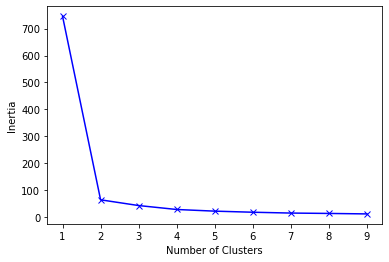

In [4]:
inertia = []
for k in range(1, 10):
    kmeanModel = KMeans(n_clusters = k).fit(train)
    kmeanModel.fit(train)
    inertia.append(kmeanModel.inertia_)

plt.plot(range(1, 10), inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
kmeans = KMeans(n_clusters = 2).fit(train)

In [6]:
labels = pd.DataFrame(kmeans.labels_)
labeled_train = pd.concat((train,labels),axis=1)
labeled_train = labeled_train.rename({0:'clusters'},axis=1)

In [7]:
labeled_train.head(10)

,"Stemming, m",Charge Per Hole,"Average Spacing, m","Average Burden, m",clusters
0,3.65,9.556761,5.15,4.25,0
1,3.55,9.428631,5.50,4.40,0
2,3.60,9.494186,5.30,4.15,0
3,3.40,9.640602,5.20,4.30,0
4,3.30,9.837349,5.30,4.20,0
5,3.35,9.817440,5.25,4.15,0
6,4.00,6.998571,5.00,4.00,1
7,3.80,7.465143,5.20,4.00,1
8,3.75,9.125588,5.75,4.00,0
9,3.90,7.231857,5.00,4.00,1


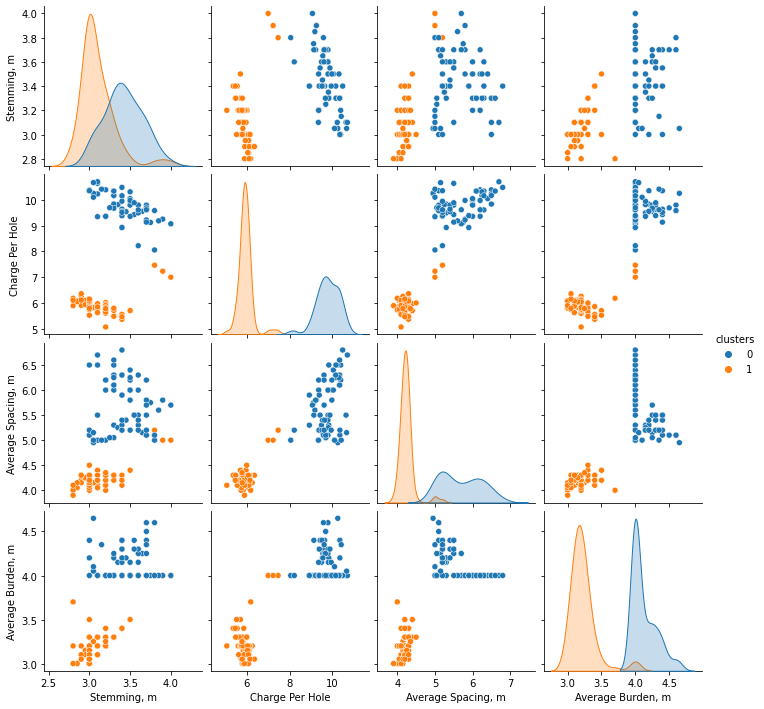

In [8]:
sns.pairplot(labeled_train,hue='clusters')

In [9]:
test = pd.read_csv("Anfo_TestCases.csv")
test.describe()

,"Stemming, m",Charge Per Hole,"Average Spacing, m","Average Burden, m"
count,17.000000,17.000000,17.000000,17.000000
mean,3.270588,19.363219,3.723529,8.394118
std,0.215826,5.786824,0.594537,0.590784
min,3.000000,11.034226,3.000000,7.200000
25%,3.100000,15.008333,3.100000,8.200000
50%,3.200000,20.991162,4.000000,8.500000
75%,3.400000,23.706468,4.200000,8.800000
max,3.600000,28.640873,4.500000,9.250000


In [10]:
kmeans.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

    Stemming, m  Charge Per Hole  Average Spacing, m  Average Burden, m  \
0          3.10        27.354839                4.25               8.60   
1          3.15        28.640873                4.10               9.00   
2          3.60        20.991162                4.20               8.50   
3          3.40        22.676471                4.00               8.40   
4          3.35        23.706468                4.15               8.50   
5          3.30        25.698653                4.00               8.80   
6          3.60        22.270833                4.50               8.80   
7          3.55        21.504818                4.50               8.50   
8          3.55        24.759081                4.50               9.25   
9          3.00        17.660256                3.00               9.00   
10         3.10        15.378198                3.10               8.50   
11         3.20        11.862981                3.20               7.50   
12         3.00        15

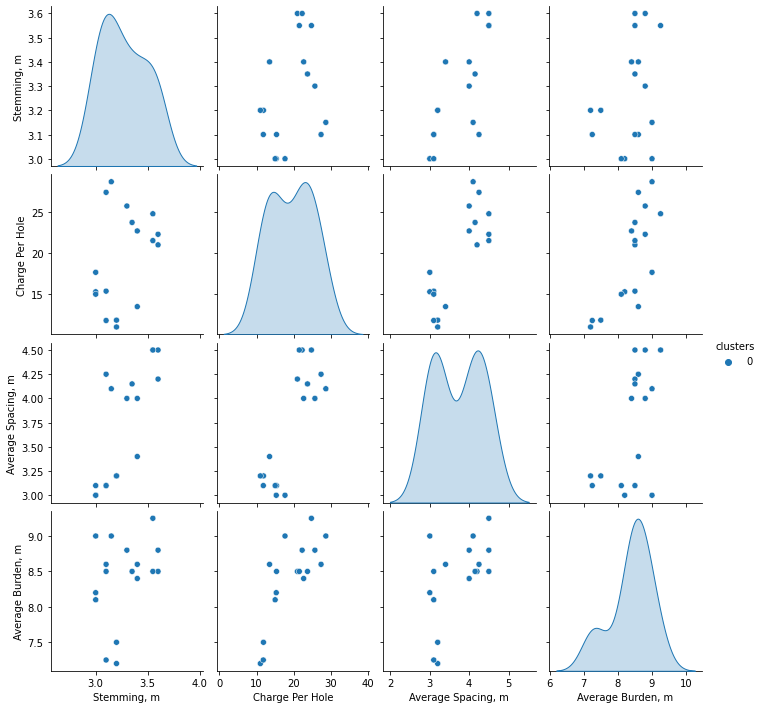

In [11]:
labels_test = pd.DataFrame(kmeans.predict(test))
labeled_test = pd.concat((test,labels_test),axis=1)
labeled_test = labeled_test.rename({0:'clusters'},axis=1)
print(labeled_test)
sns.pairplot(labeled_test,hue="clusters")

In [12]:
labeled_train.to_csv("Train_no_dia.csv")

In [12]:
labeled_test.to_csv("Test_no_dia.csv")